In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from multiclass_regression import MulticlassRegression
from plotters import plot_loss, plot_image

np.random.seed(43)

In [3]:
x, y = datasets.load_digits(n_class=10, return_X_y=True, as_frame=False)

In [4]:
np.unique(y_test, return_counts=True)

NameError: name 'y_test' is not defined

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


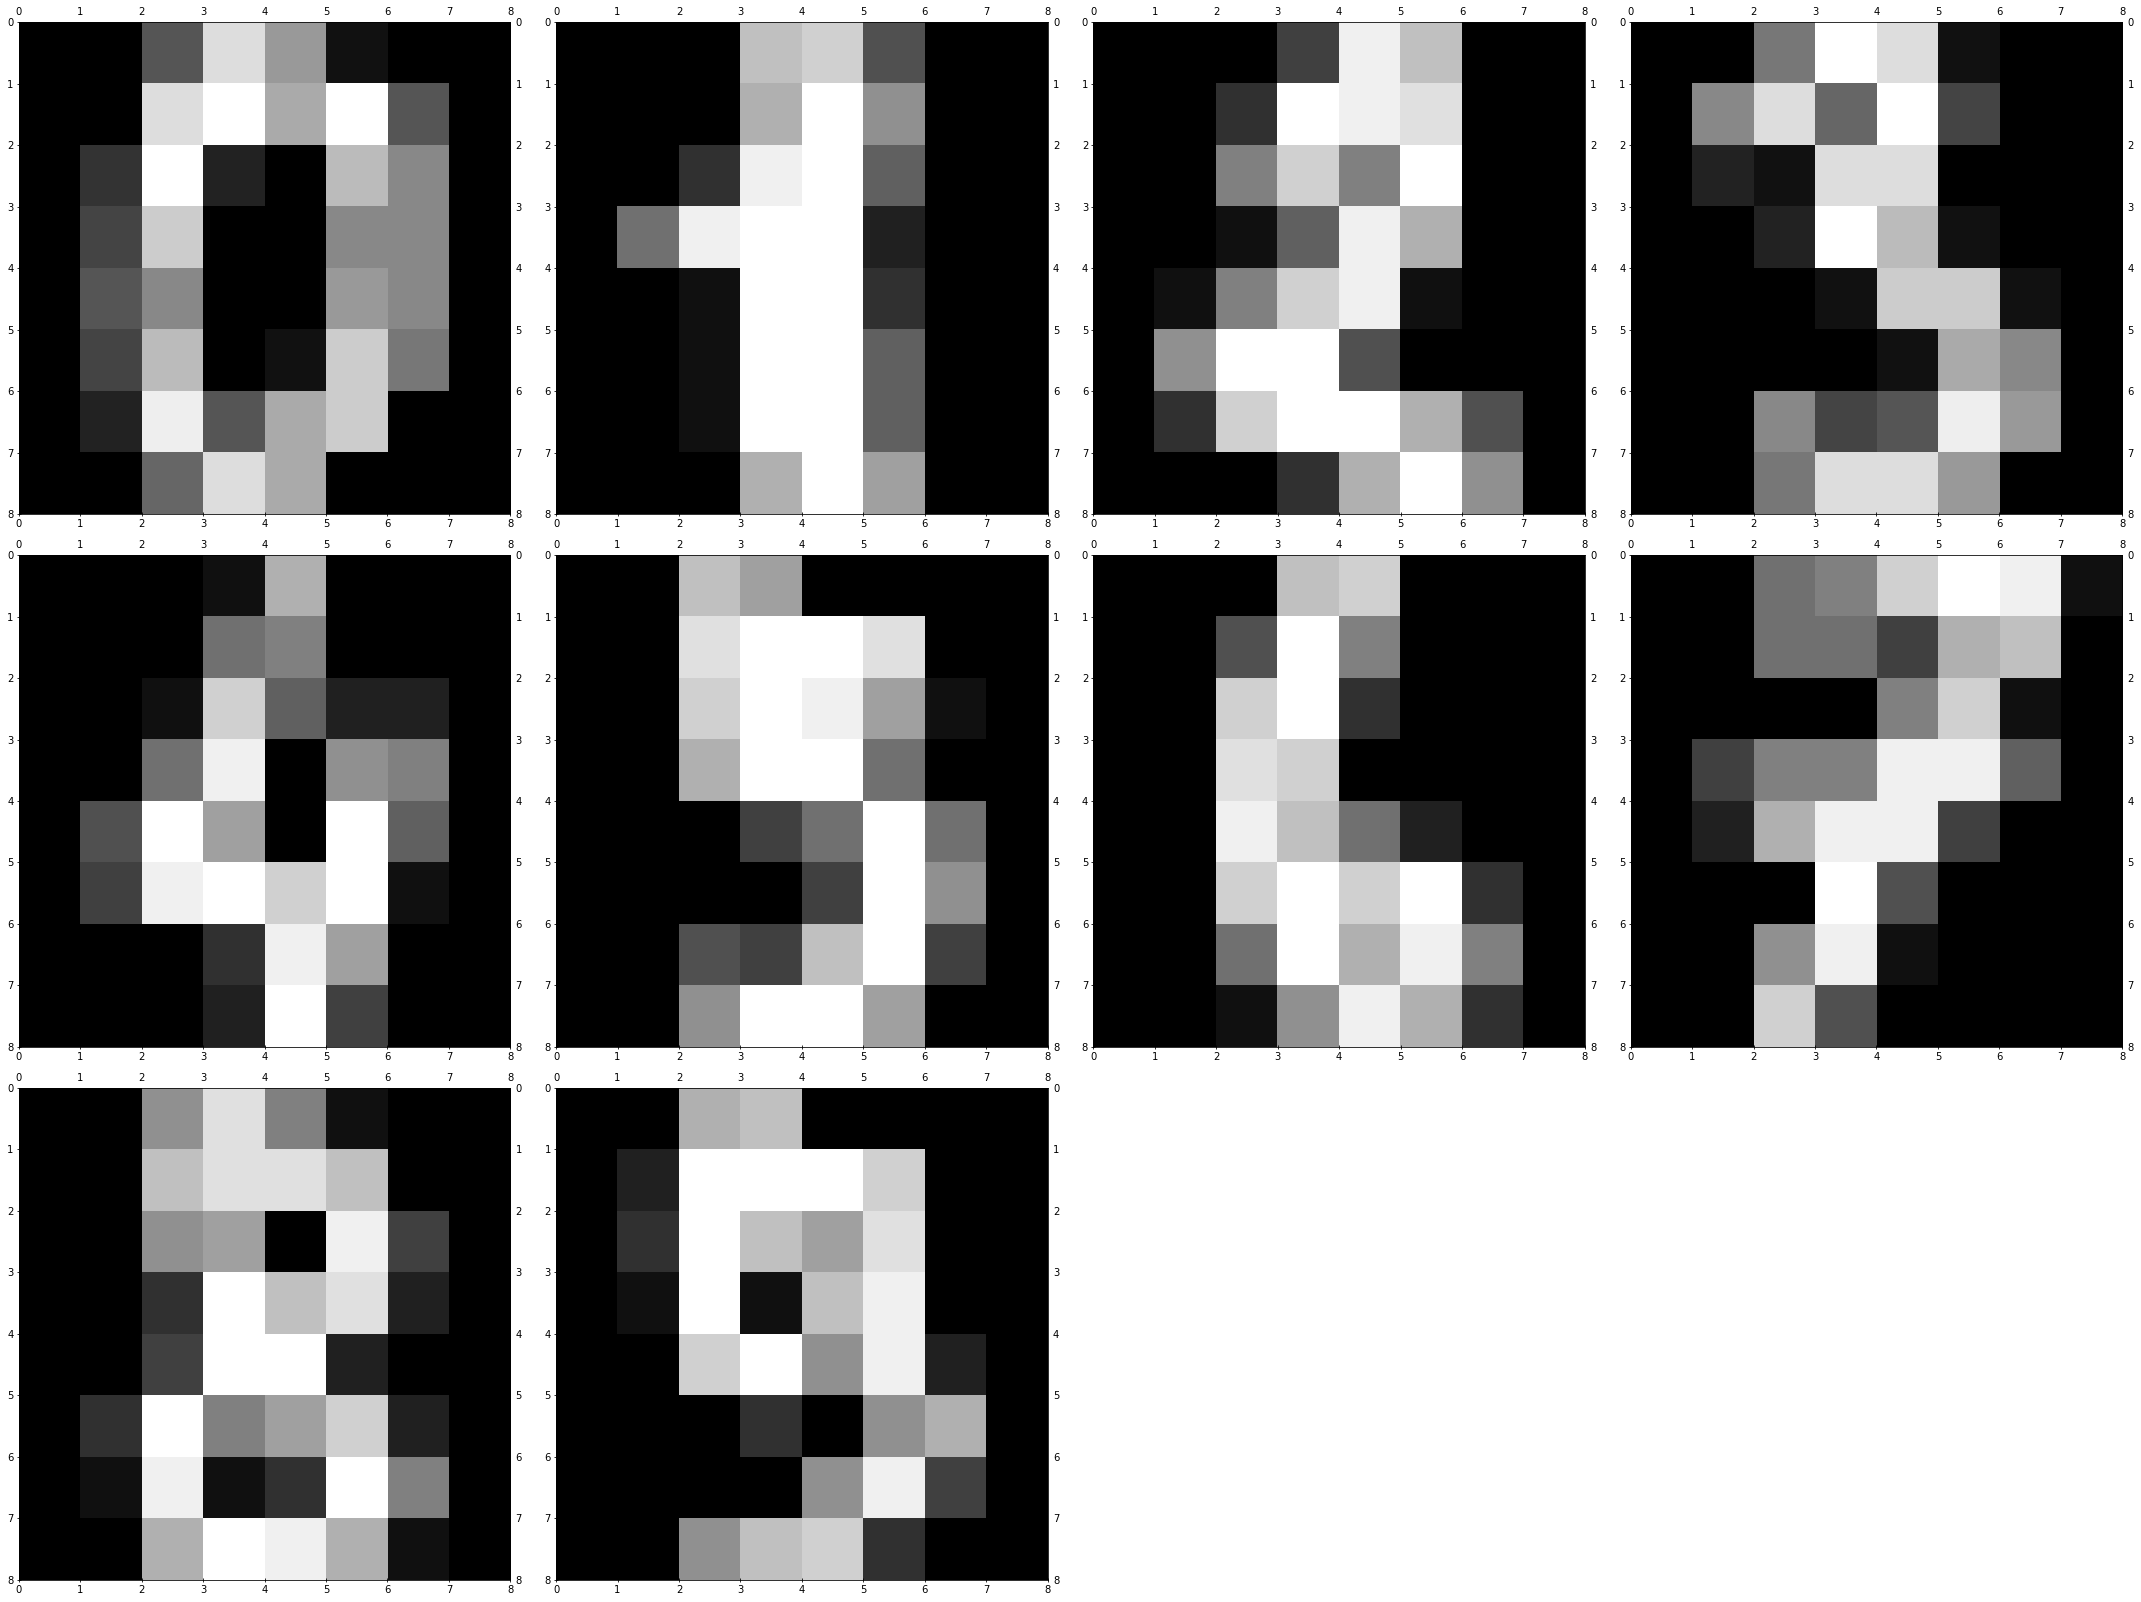

In [5]:
plot_image([x[i].reshape((8,8)).T for i in range(10)], cmap='gray', separate=True)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
def one_hot_encode(y, n_classes):
    one_hot_encoded = np.zeros(shape=(y.shape[0], n_classes))
    for i in range(len(y)):
        one_hot_encoded[i][y[i]] = 1
    return one_hot_encoded


def train_model(x, y, model, n_classes, n_iters, batch_size):
    
    loss = []

    for i in tqdm(range(n_iters)):
        batch_idx = np.random.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        
        batch_y_ohe = one_hot_encode(batch_y, n_classes)
        
        L = model.train(batch_x, batch_y_ohe)

        loss.append(L)
        if i == 5000:
            model.lr /= 5
    return loss

  0%|          | 0/20000 [00:00<?, ?it/s]

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


AttributeError: 'bool' object has no attribute 'sum'

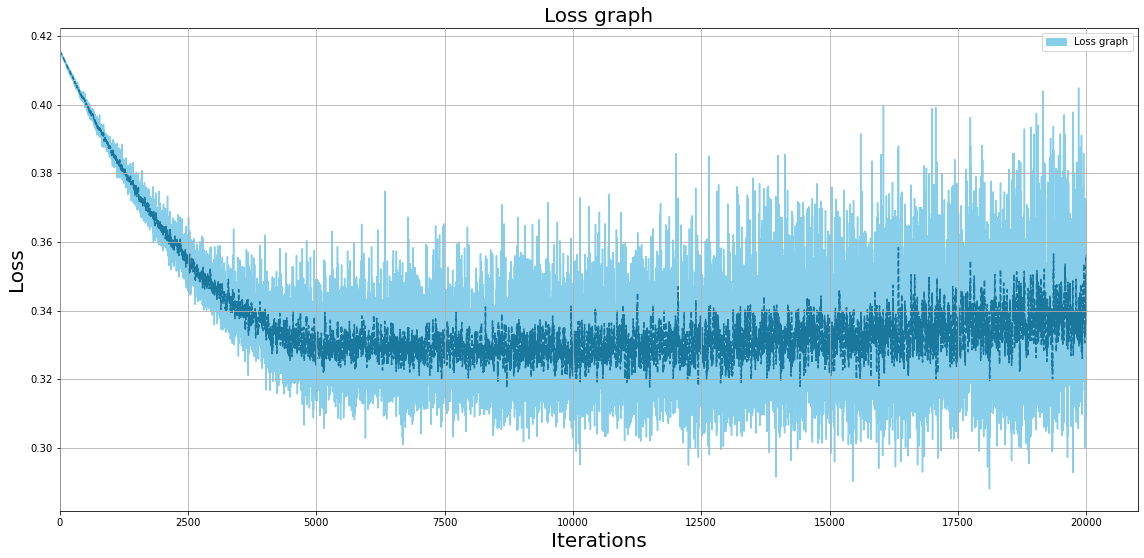

In [8]:
model = MulticlassRegression(64, 10, lr=1e-7)
loss = train_model(x_train, y_train, model, 10, 20000, 64)
plot_loss(np.array(loss), figsize=(16,8), final_mean=None)
model.evaluate(x_test, one_hot_encode(y_test, 10))

0.8622222222222222

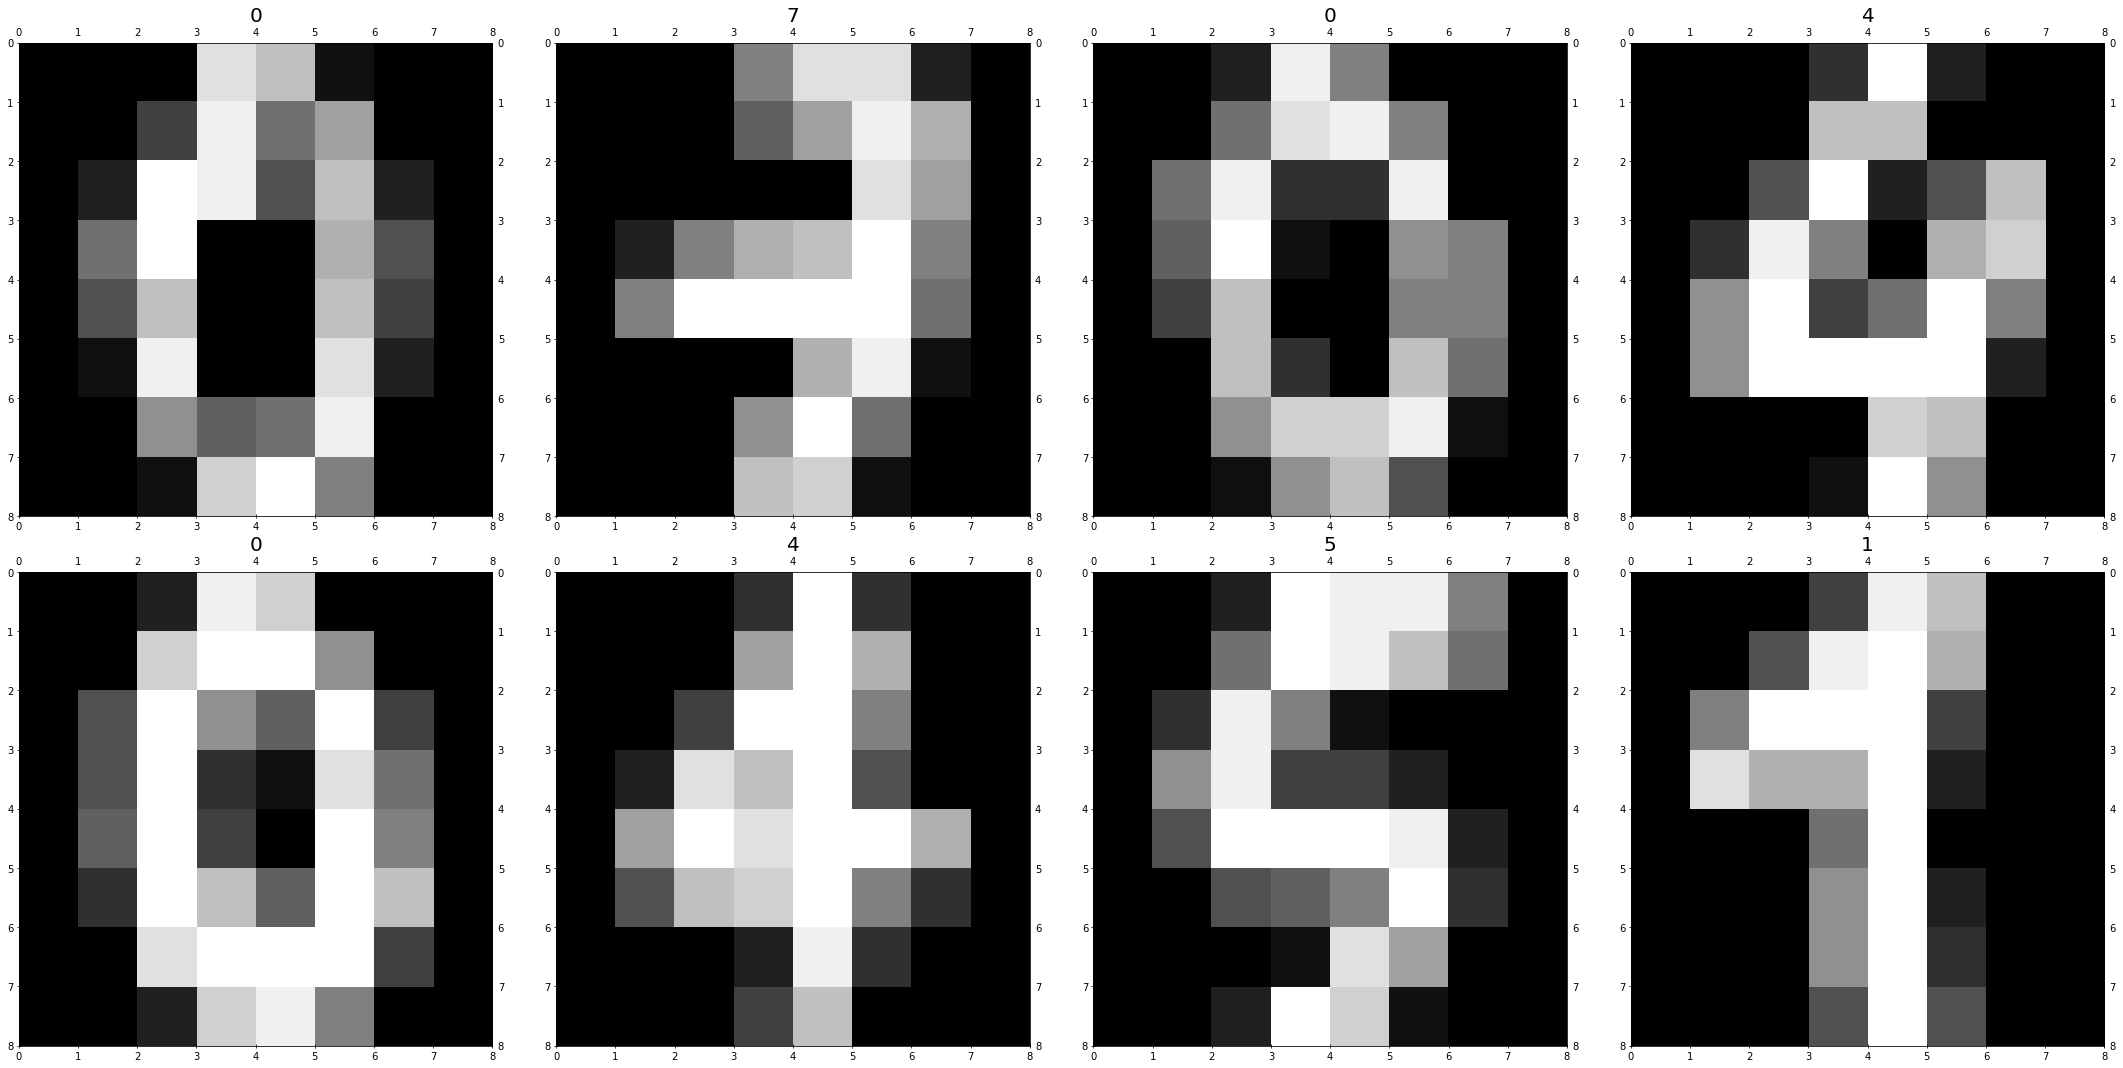

In [12]:
correct_idx = np.where(correct)[0]
idx = np.random.choice(correct_idx, 8)

plot_data = [x_test[i].reshape((8,8)).T for i in idx]
plot_title = [str(y_test_hat[i]) for i in idx]
plot_image(plot_data, title=plot_title, cmap='gray', separate=True)

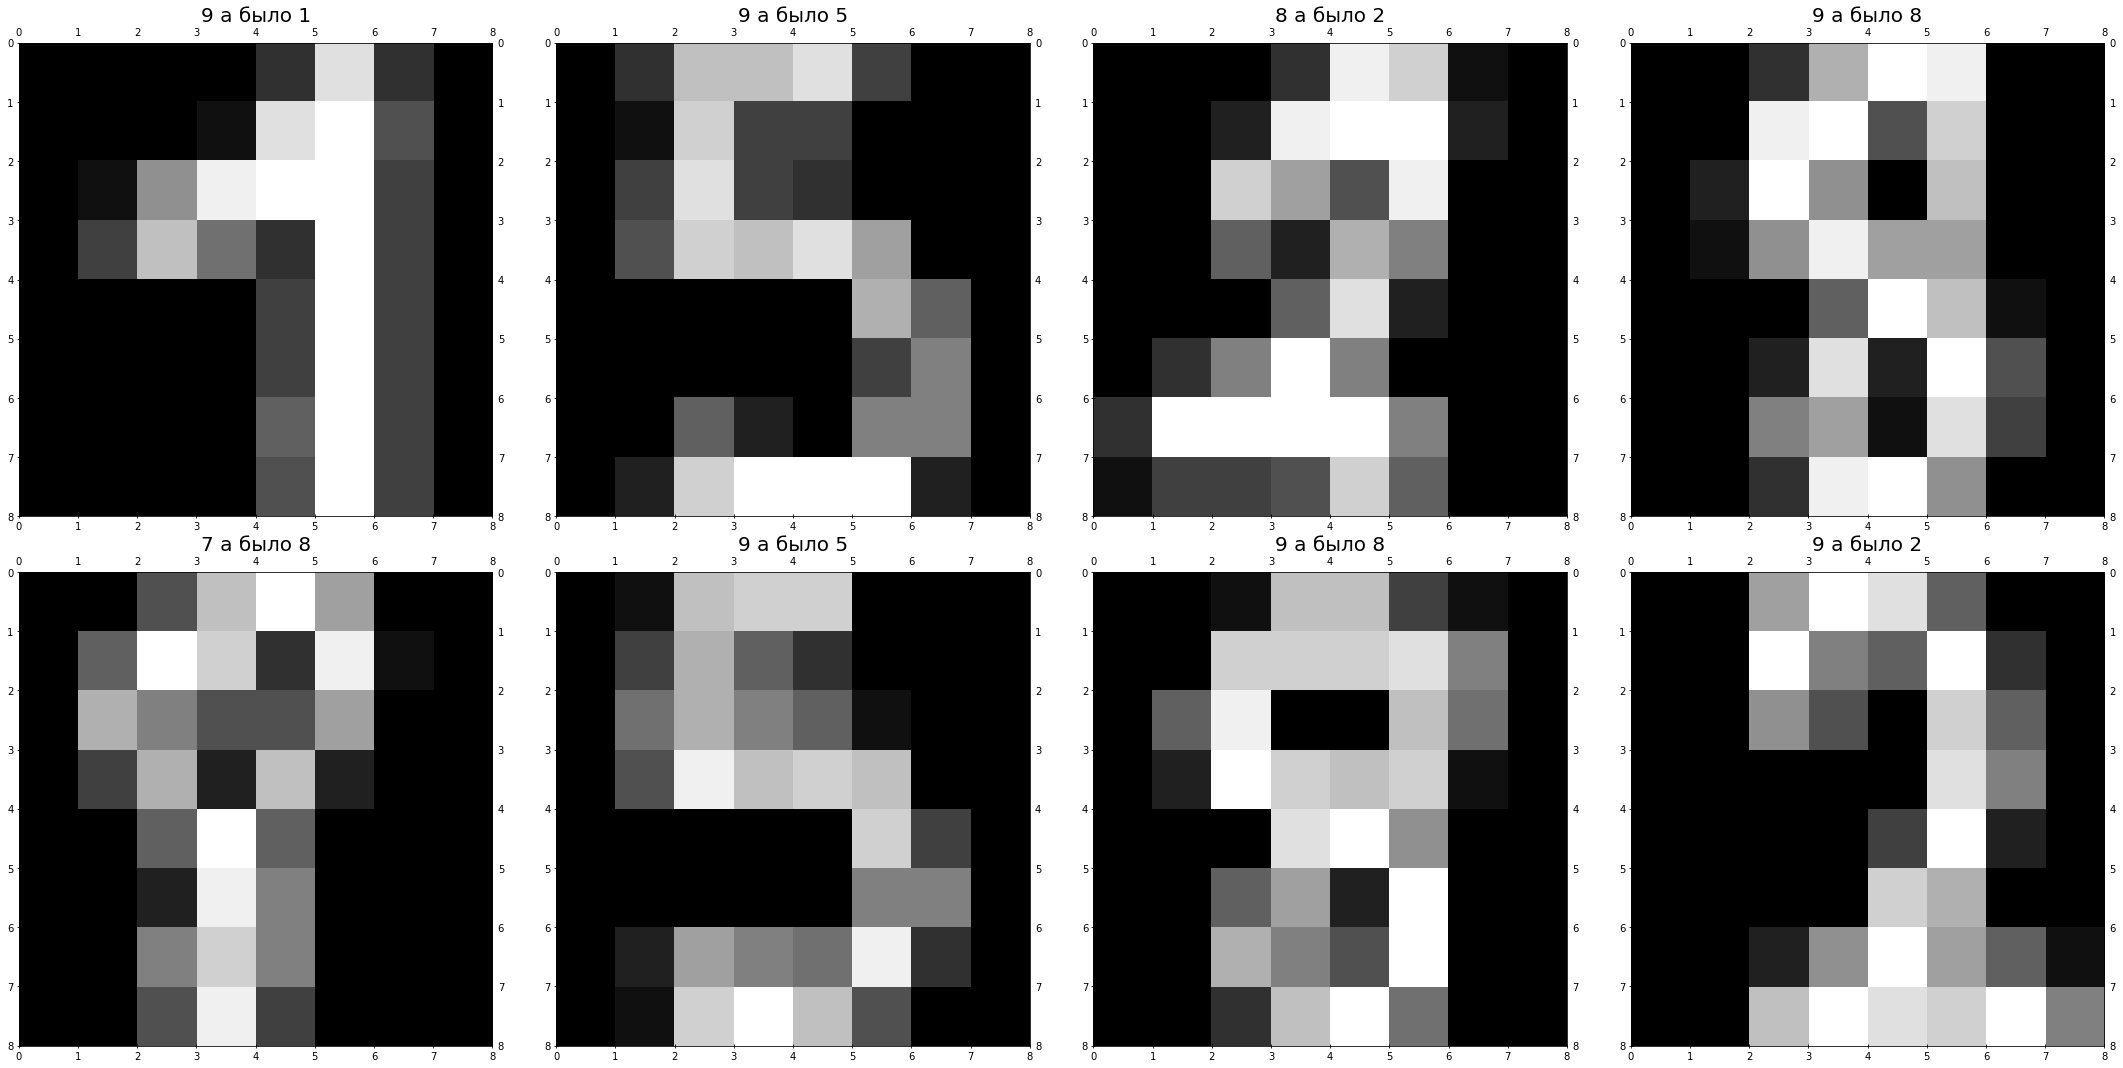

In [13]:
wrong_idx = np.where(~correct)[0]
idx = np.random.choice(wrong_idx, 8)

plot_data = [x_test[i].reshape((8,8)).T for i in idx]
plot_title = [str(y_test_hat[i]) + ' а было ' + str(y_test[i]) for i in idx]
plot_image(plot_data, title=plot_title, cmap='gray', separate=True)

In [14]:
y_train.shape

(1347,)

In [126]:
# precision
y_hat_test_ohe = model.forward(x_test)
y_hat_test = y_hat_test_ohe.argmax(axis=1)
correct = (y_hat_test==y_test)

for class_mark in range(10):
    idx = np.where(y_hat_test == class_mark)[0]
    
    precision = correct[idx].sum() / len(idx)
    
    print(class_mark, ' ', round(precision, 3))

0   1.0
1   0.793
2   0.791
3   0.962
4   1.0
5   0.844
6   1.0
7   0.78
8   0.938
9   0.642


In [127]:
# recall
y_hat_test_ohe = model.forward(x_test)
y_hat_test = y_hat_test_ohe.argmax(axis=1)
correct = (y_hat_test==y_test)

for class_mark in range(10):
    idx = np.where(y_test == class_mark)[0]
    
    recall = correct[idx].sum() / len(idx)
    
    print(class_mark, ' ', round(recall, 3))

0   1.0
1   0.622
2   0.895
3   0.806
4   0.92
5   0.884
6   1.0
7   1.0
8   0.556
9   0.896


In [6]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [8]:
a.sum(axis=1), a.sum(axis=0)

(array([3, 7]), array([4, 6]))